### Author : Abhilash A ,    abhilashabhi3836@gmail.com

### Data Science And Business Analytics Internship

## GRIP The Spark Foundation

### GRIPNOV20

### TASK2- Prediction using Unsupervised ML

In [24]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# reading the data set
data = pd.read_csv("Iris.csv")

In [26]:

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

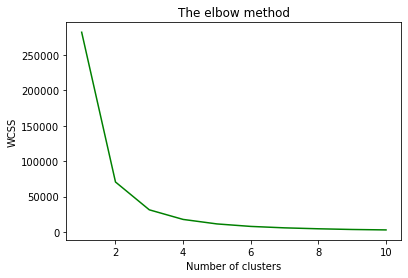

In [29]:

# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss,color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<AxesSubplot:>

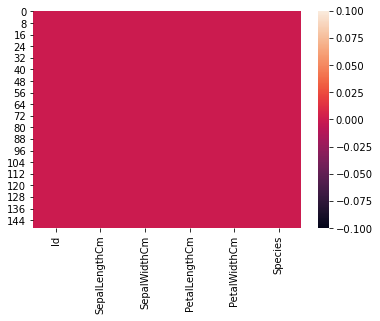

In [30]:
sns.heatmap(data.isnull())

<AxesSubplot:>

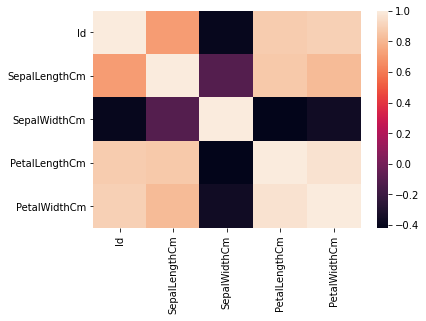

In [31]:
# finding correlation
corr= data.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='count'>

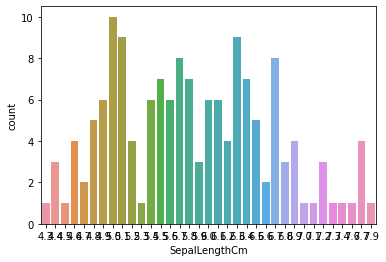

In [32]:
sns.countplot(x=data['SepalLengthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='count'>

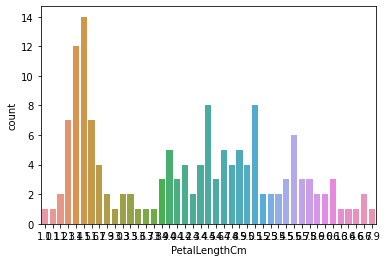

In [33]:
sns.countplot(x=data['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

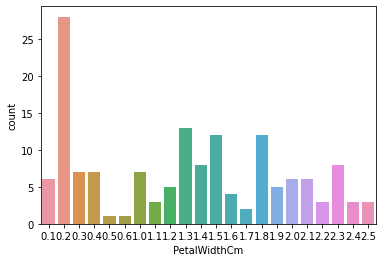

In [34]:
sns.countplot(x=data['PetalWidthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='count'>

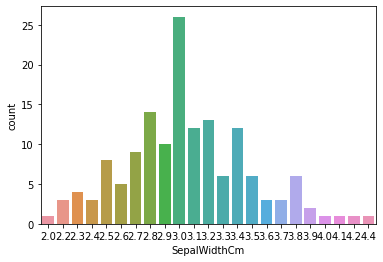

In [35]:
sns.countplot(x=data['SepalWidthCm'])

In [36]:
 #Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0,n_jobs=None)
y_kmeans = kmeans.fit_predict(x)

C:\Users\abhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


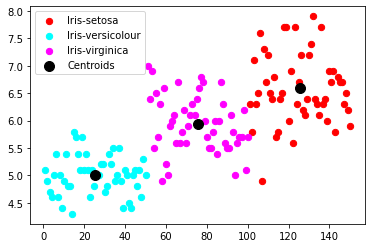

In [37]:

# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],  s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],  s = 40, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],  s = 40, c = 'magenta', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()